In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
plt.style.use('seaborn')

# COVID 19 dataset, updated 2021/07/05

In [204]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [47]:
df.tail(5)

iso_code continent  location        date  total_cases  new_cases  \
100186      ZWE    Africa  Zimbabwe  2021-06-30      49864.0     1331.0   
100187      ZWE    Africa  Zimbabwe  2021-07-01      51221.0     1357.0   
100188      ZWE    Africa  Zimbabwe  2021-07-02      52663.0     1442.0   
100189      ZWE    Africa  Zimbabwe  2021-07-03      53665.0     1002.0   
100190      ZWE    Africa  Zimbabwe  2021-07-04      54474.0      809.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
100186             912.000        1789.0        28.0               13.857   
100187             987.857        1808.0        19.0               14.143   
100188            1063.714        1841.0        33.0               17.143   
100189            1092.429        1859.0        18.0               19.143   
100190            1147.429        1878.0        19.0               20.286   

        ...  extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
100186  ...             21.4                307.846                 1.82   
100187  ...             21.4                307.846                 1.82   
100188  ...             21.4                307.846                 1.82   
100189  ...             21.4                307.846                 1.82   
100190  ...             21.4                307.846                 1.82   

        female_smokers  male_smokers  handwashing_facilities  \
100186             1.6          30.7                  36.791   
100187             1.6          30.7                  36.791   
100188             1.6          30.7                  36.791   
100189             1.6          30.7                  36.791   
100190             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
100186                         1.7            61.49                    0.571   
100187                         1.7            61.49                    0.571   
100188                         1.7            61.49                    0.571   
100189                         1.7            61.49                    0.571   
100190                         1.7            61.49                    0.571   

        excess_mortality  
100186               NaN  
100187               NaN  
100188               NaN  
100189               NaN  
100190               NaN  

[5 rows x 60 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100191 entries, 0 to 100190
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               100191 non-null  object 
 1   continent                              95495 non-null   object 
 2   location                               100191 non-null  object 
 3   date                                   100191 non-null  object 
 4   total_cases                            96584 non-null   float64
 5   new_cases                              96581 non-null   float64
 6   new_cases_smoothed                     95571 non-null   float64
 7   total_deaths                           86431 non-null   float64
 8   new_deaths                             86587 non-null   float64
 9   new_deaths_smoothed                    95571 non-null   float64
 10  total_cases_per_million                96070 non-null   

In [205]:
# DATE RANGE
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d')   # change the date format to pandas
df.set_index('date',inplace=True)   # set dates as indexes

In [218]:
# COUNTRIES
print(f"Number of countries: {df['location'].nunique()}")

Number of countries: 230


In [206]:
# keep only countries, remove momentarily 'World', 'Europe', etc..
df_countries = df[df['continent'].notna()]

In [144]:
# import PLOTLY
import plotly.express as px

fig = px.choropleth(df_countries.loc['2021-07-04'], locations="iso_code",
                    color="total_deaths_per_million", 
                    hover_name="location", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,title='Total COVID-19 death per million people',
                   labels = {"total_deaths_per_million":''})
fig.update_layout(
    title={
        'text': "Total COVID-19 deaths per million people",
        'y':0.85,
        'x':0.52,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [143]:
import plotly.express as px

fig = px.choropleth(df_countries.loc['2021-06-30'], locations="iso_code",
                    color="people_vaccinated_per_hundred", 
                    hover_name="location", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'people_vaccinated_per_hundred': ''}
                    
                    )
fig.update_layout(
    title={
        'text': "Vaccinated people per hundred inhabitants",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig.show()


## Effect of vaccinations

Vaccinations campaigns seem to have a positive effect in the number of deaths. However, some countries, mostly southamericans, have still serious problems to control the pandemic


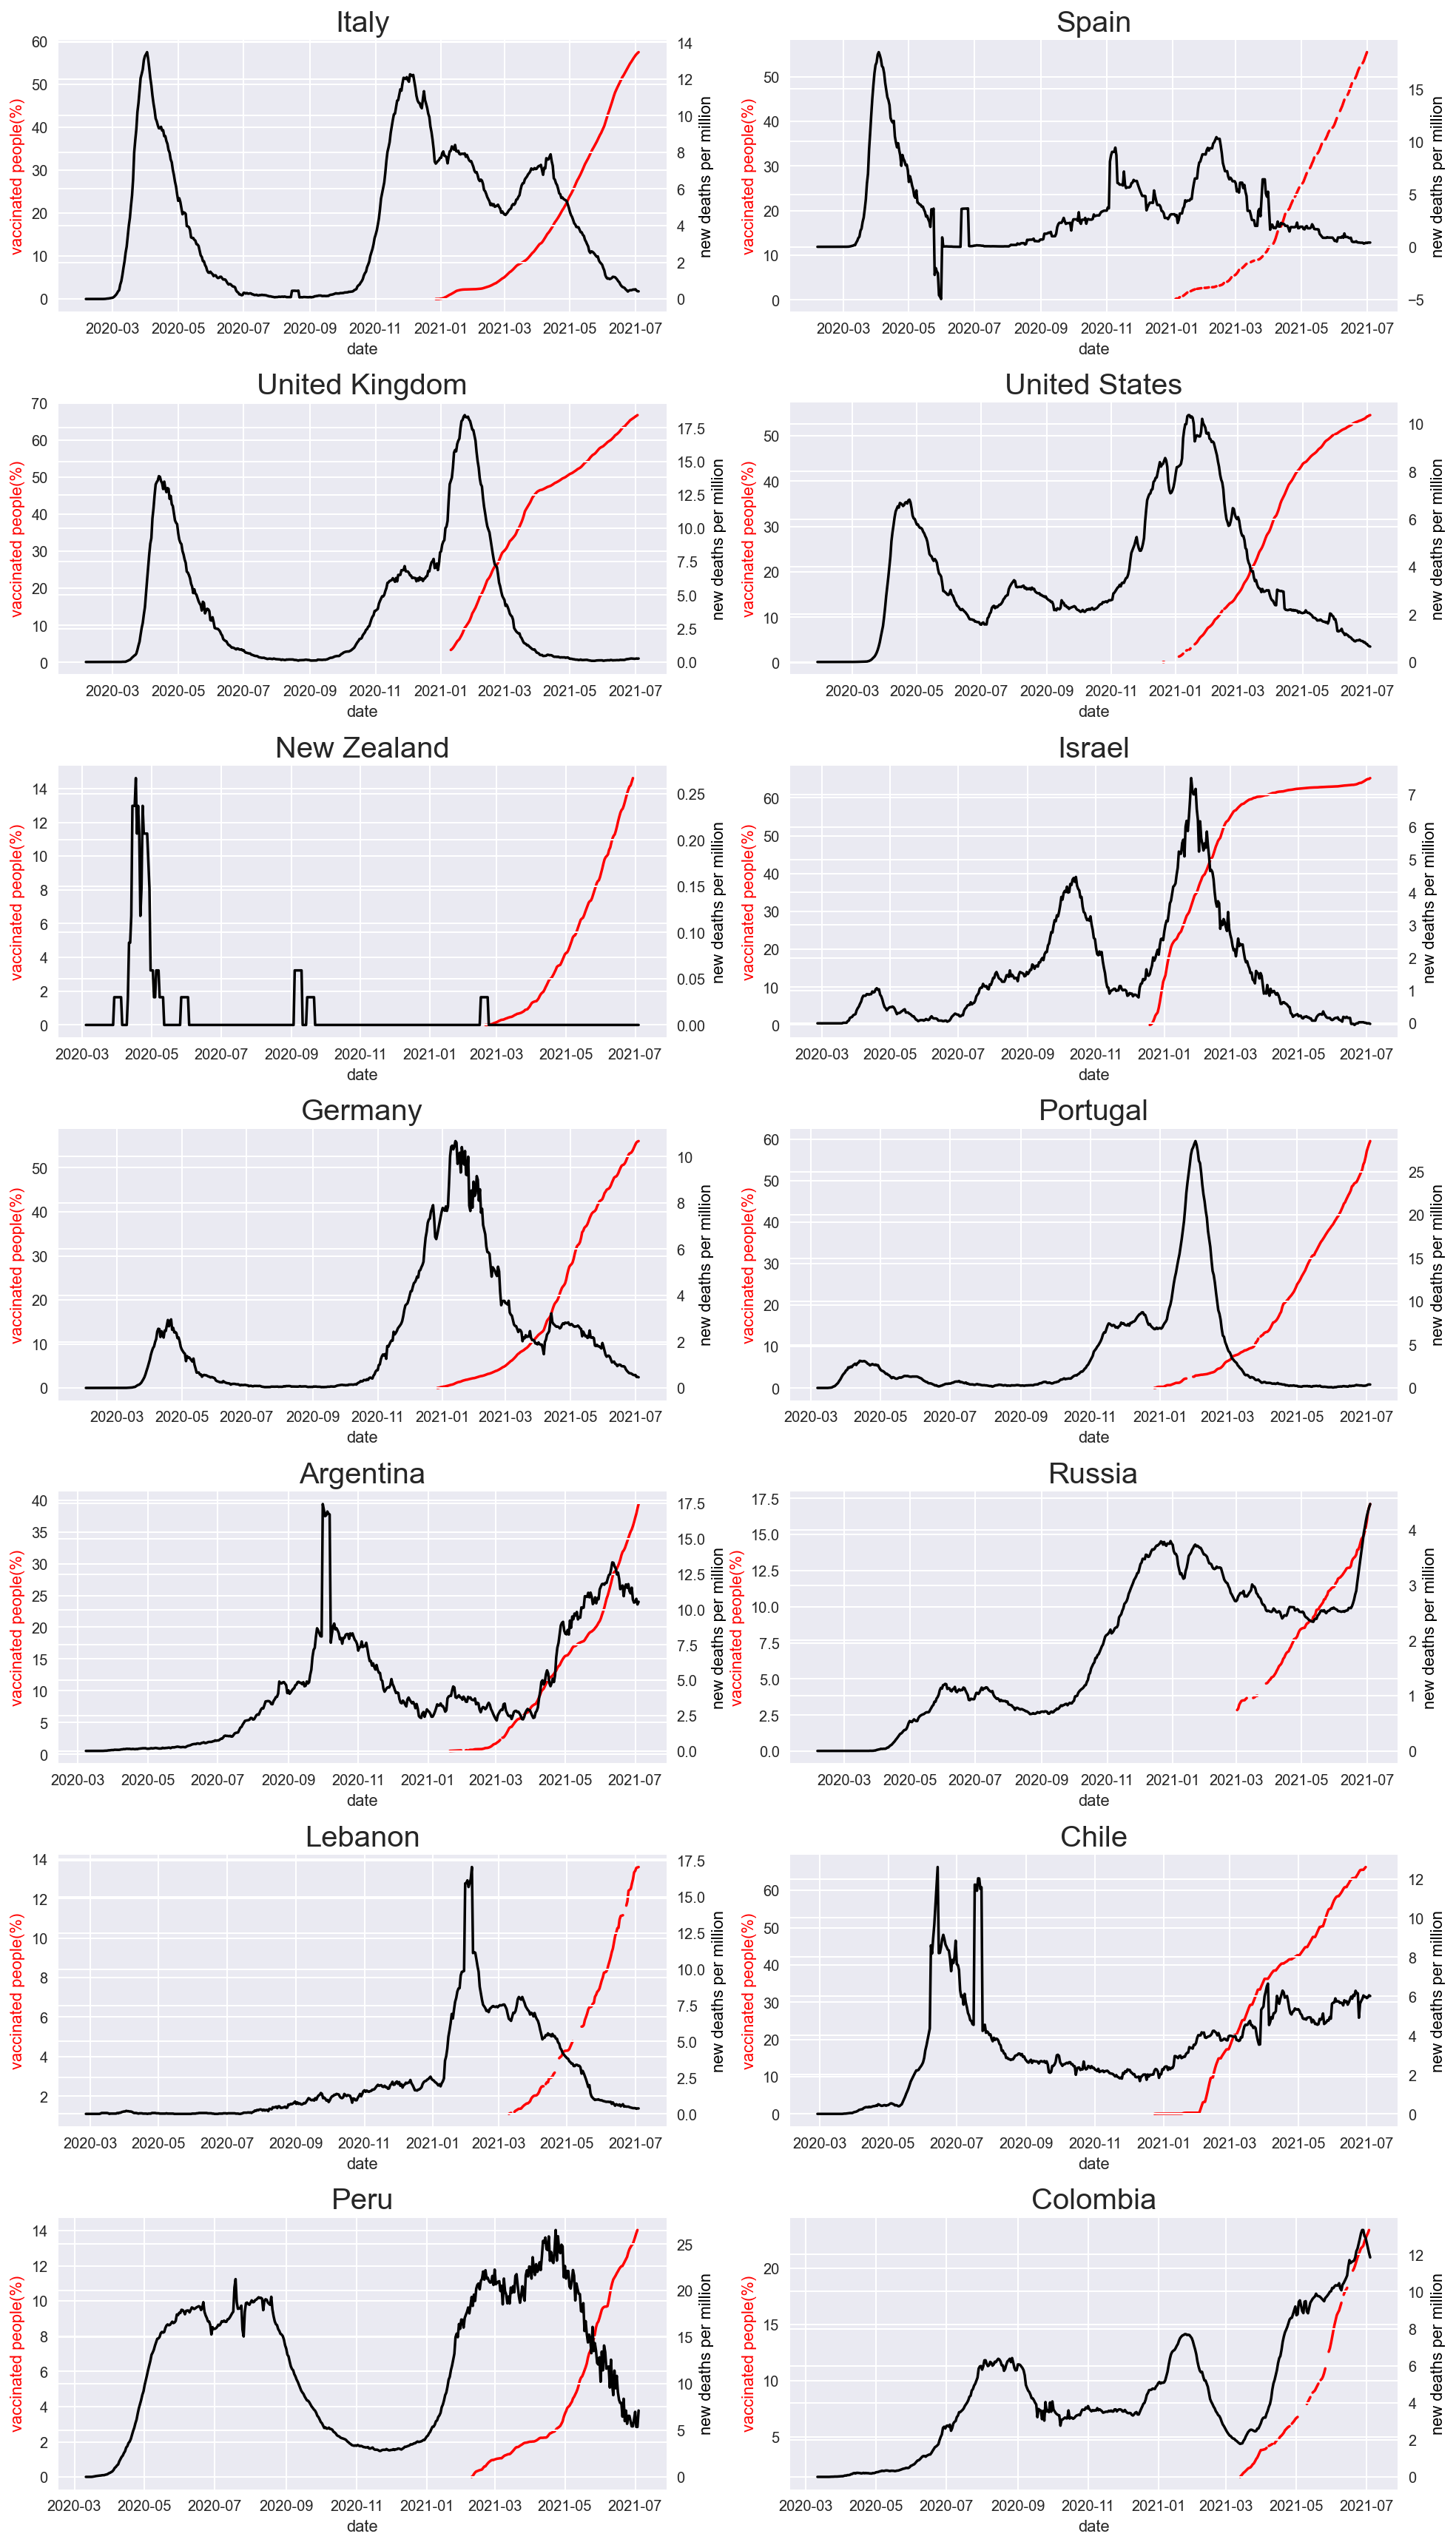

In [230]:
selected_countries = ['Italy','Spain','United Kingdom','United States','New Zealand','Israel','Germany','Portugal','Argentina','Russia','Lebanon','Chile','Peru','Colombia']
['Israel','United States','Germany','Japan','Italy','Chile','Argentina','Brazil']
fig,ax = plt.subplots(7,2,figsize=(14,24))
ax = ax.ravel()

for i,country in enumerate(selected_countries):
    ax0 = ax[i].twinx()
    ax[i].plot(df[df['location'] == country]['people_vaccinated_per_hundred'],color='red',label='vaccinated')
    ax0.plot(df[df['location'] == country]['new_deaths_smoothed_per_million'],color='black',label='cases')
    ax[i].set_title(country,size=20)
   # ax[i].annotate('x20',xy=(df[df['location'] == country]['new_cases_smoothed'].index[-1],
    #                        df[df['location'] == country]['new_cases_smoothed'][-1]), size=20)

    ax[i].set_xlabel('date')
    ax0.set_ylabel('new deaths per million', color='black')
    ax[i].set_ylabel('vaccinated people(%)', color='red')
fig.tight_layout()
print('Vaccinations campaigns seem to have a positive effect in the number of deaths. However, some countries, mostly southamericans, have still serious problems to control the pandemic')

# Argentina: quick look

Text(0, 0.5, 'total deaths')

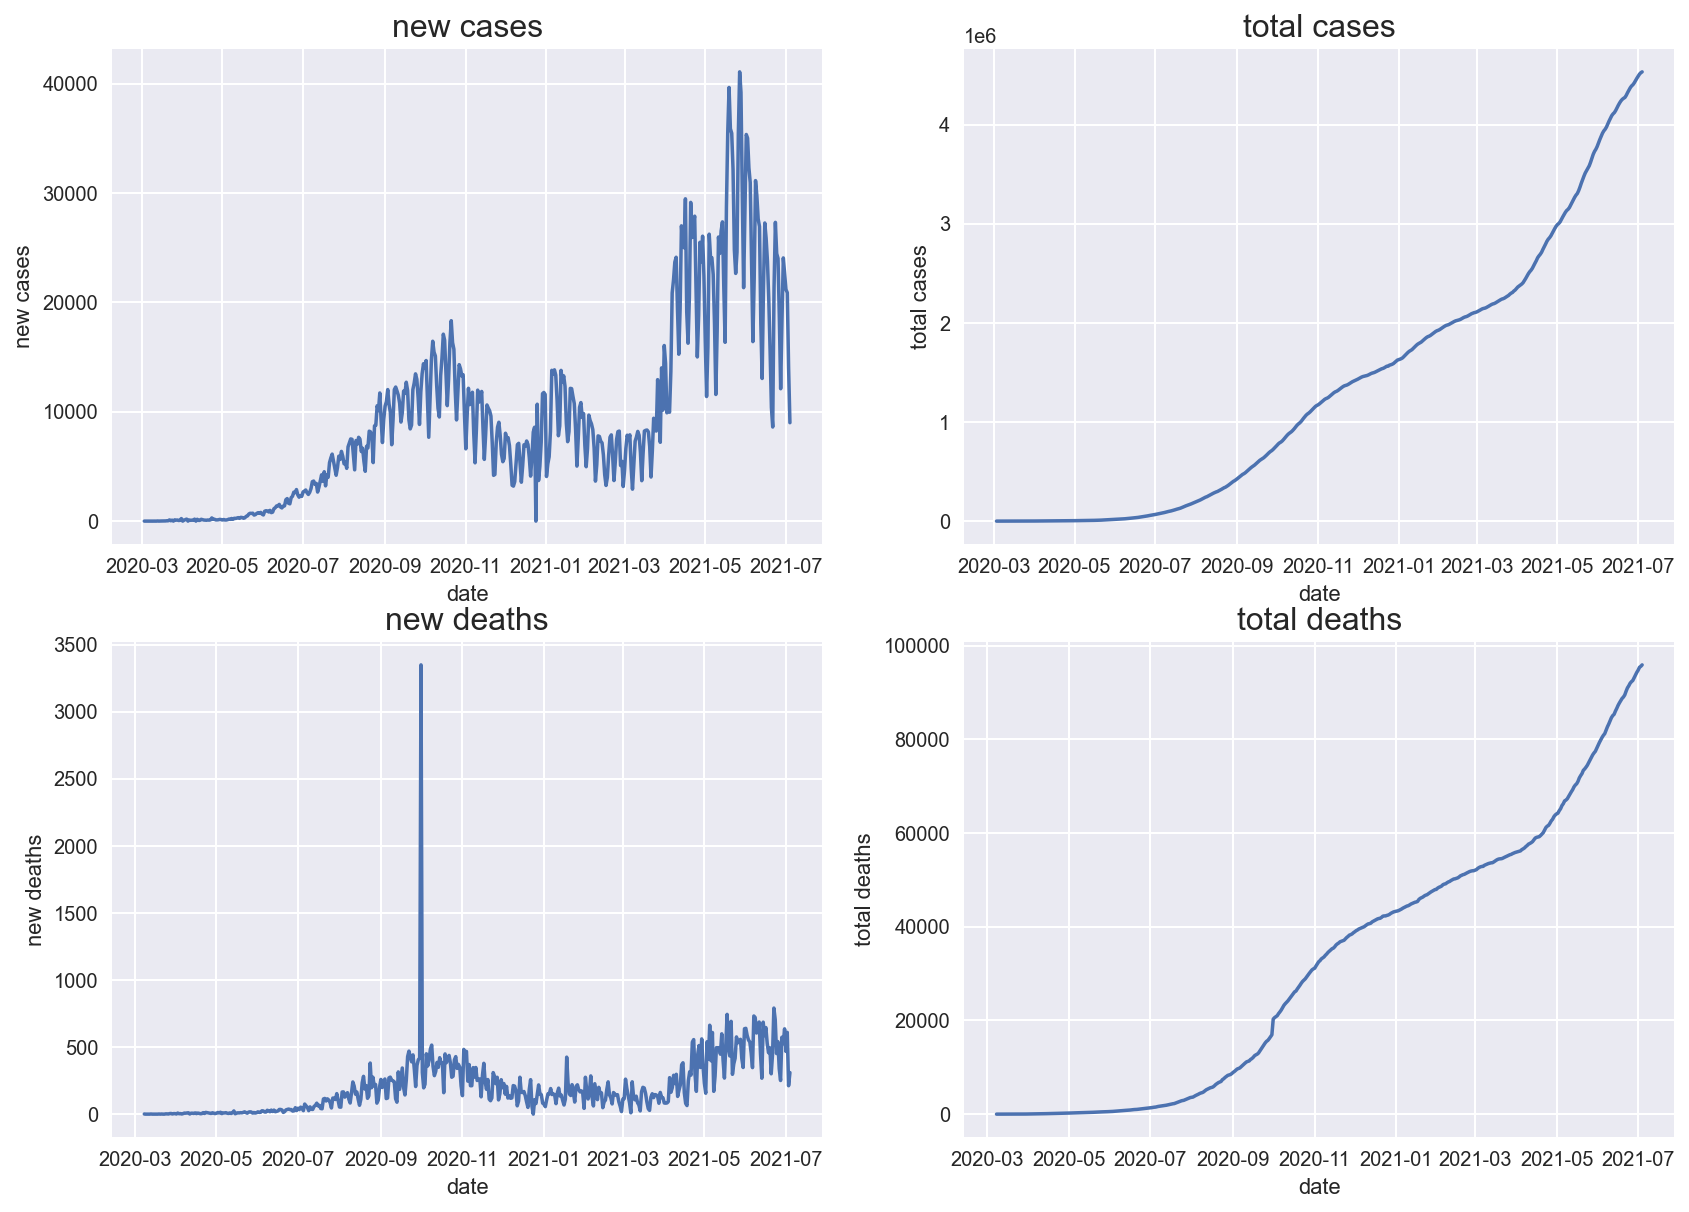

In [145]:
fig,ax = plt.subplots(2,2,figsize=(14,10))

ax[0][0].plot(df[df['location'] == 'Argentina']['new_cases'])
ax[0][0].set_title('new cases',size=16)
ax[0][0].set_xlabel('date')
ax[0][0].set_ylabel('new cases')

ax[1][0].plot(df[df['location'] == 'Argentina']['new_deaths'])
ax[1][0].set_title('new deaths',size=16)
ax[1][0].set_xlabel('date')
ax[1][0].set_ylabel('new deaths')

ax[0][1].plot(df[df['location'] == 'Argentina']['total_cases'])
ax[0][1].set_title('total cases',size=16)
ax[0][1].set_xlabel('date')
ax[0][1].set_ylabel('total cases')


ax[1][1].plot(df[df['location'] == 'Argentina']['total_deaths'])
ax[1][1].set_title('total deaths',size=16)
ax[1][1].set_xlabel('date')
ax[1][1].set_ylabel('total deaths')

# Why does the data oscillate?

In [238]:
df['weekday'] = df.index.weekday   # new column with the days of the week, 0: monday; 1: tuesday; ... 6: sunday

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_cases_arg = df[df['location'] == 'Argentina']['new_cases'].dropna() # new cases per day in Argentina
decomposition = seasonal_decompose(daily_cases_arg, model='additive')  # seasonal decomposition for new detected cases

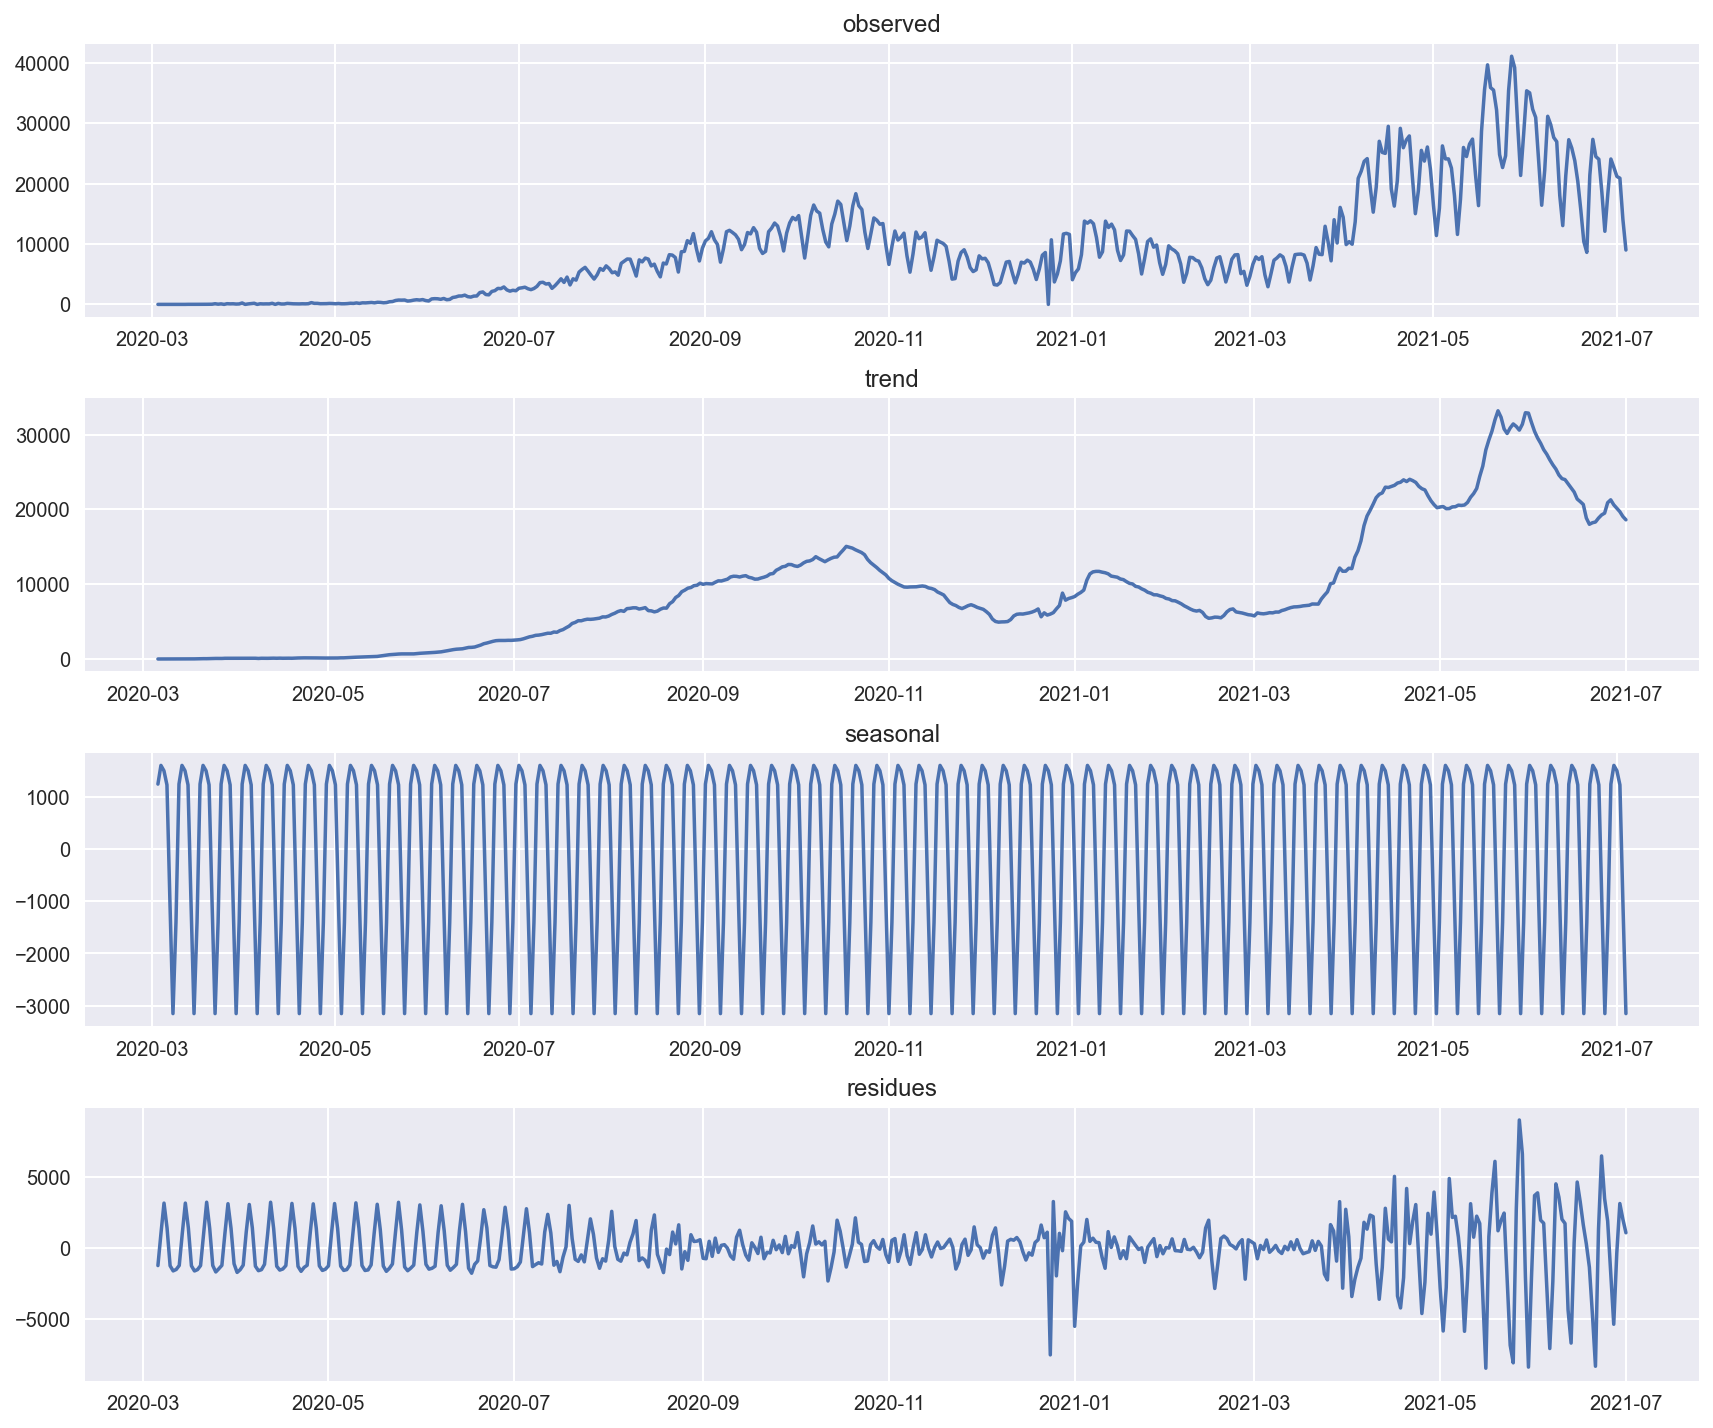

In [151]:
fig,ax = plt.subplots(4,1,figsize=(12,10))
ax[0].plot(decomposition.observed)
ax[0].set_title("observed")

ax[1].plot(decomposition.trend)
ax[1].set_title("trend")

ax[2].plot(decomposition.seasonal)
ax[2].set_title("seasonal")

ax[3].plot(decomposition.resid)
ax[3].set_title("residues")
fig.tight_layout()

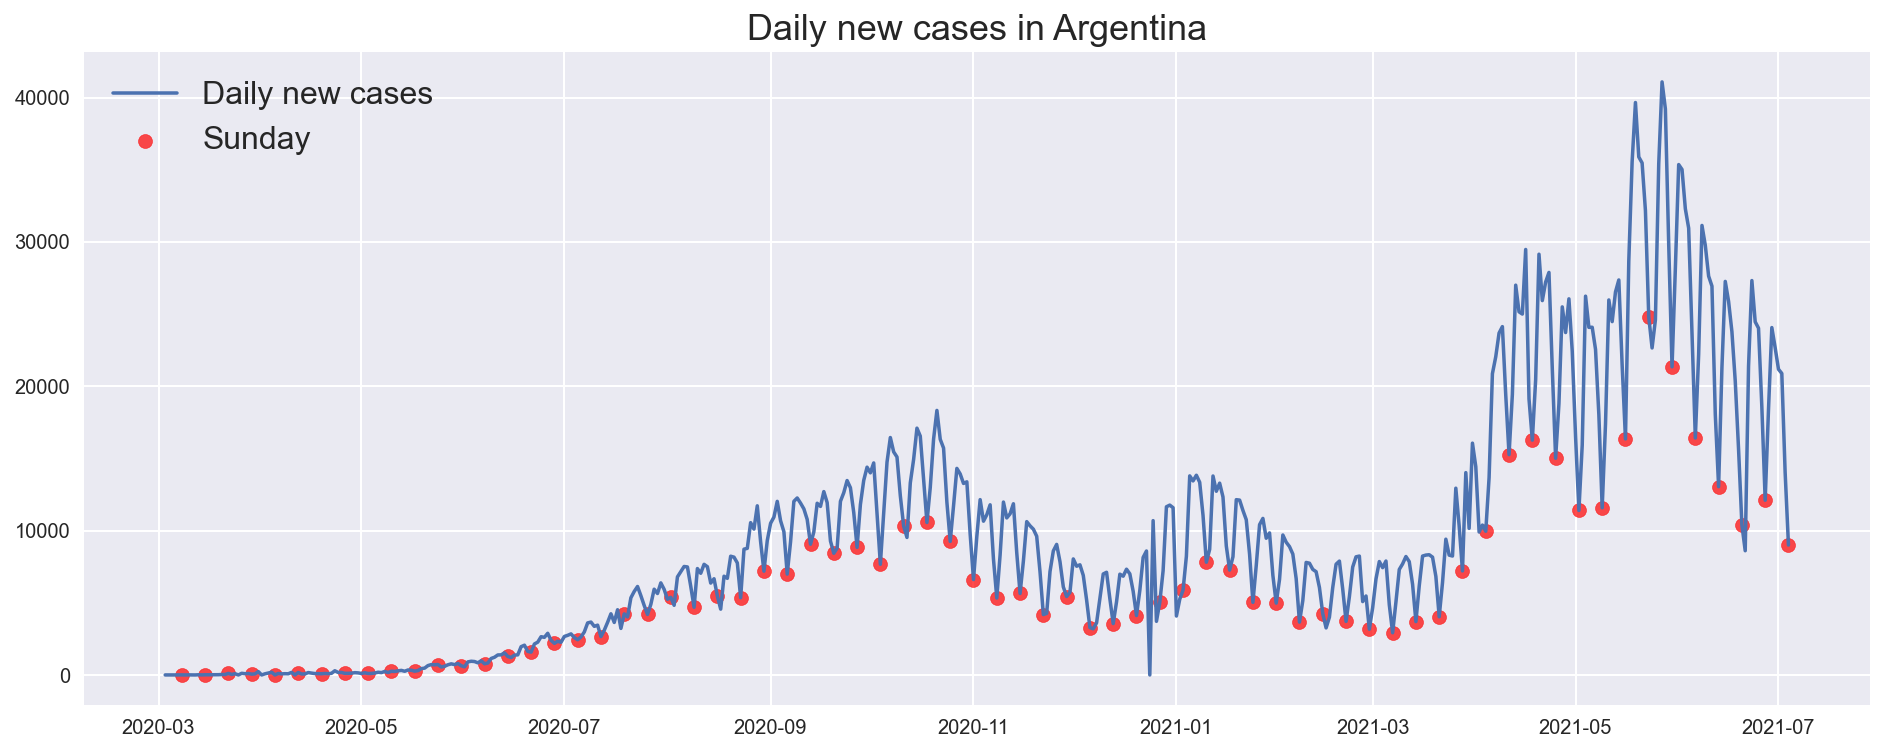

In [278]:
plt.figure(figsize=(16,6))
plt.plot(decomposition.observed,label='Daily new cases')
plt.title("Daily new cases in Argentina",size=18)

plt.scatter(df[(df['weekday'] == ( 6)) & (df['location'] == 'Argentina')]['new_cases'].index,
            df[(df['weekday'] == ( 6)) & (df['location'] == 'Argentina')]['new_cases'],
            color='red',label='Sunday',alpha=0.7)

plt.legend(fontsize=16)

Argentina is not the only country that reports less cases/deaths on Sundays, it is a worldwide trend 


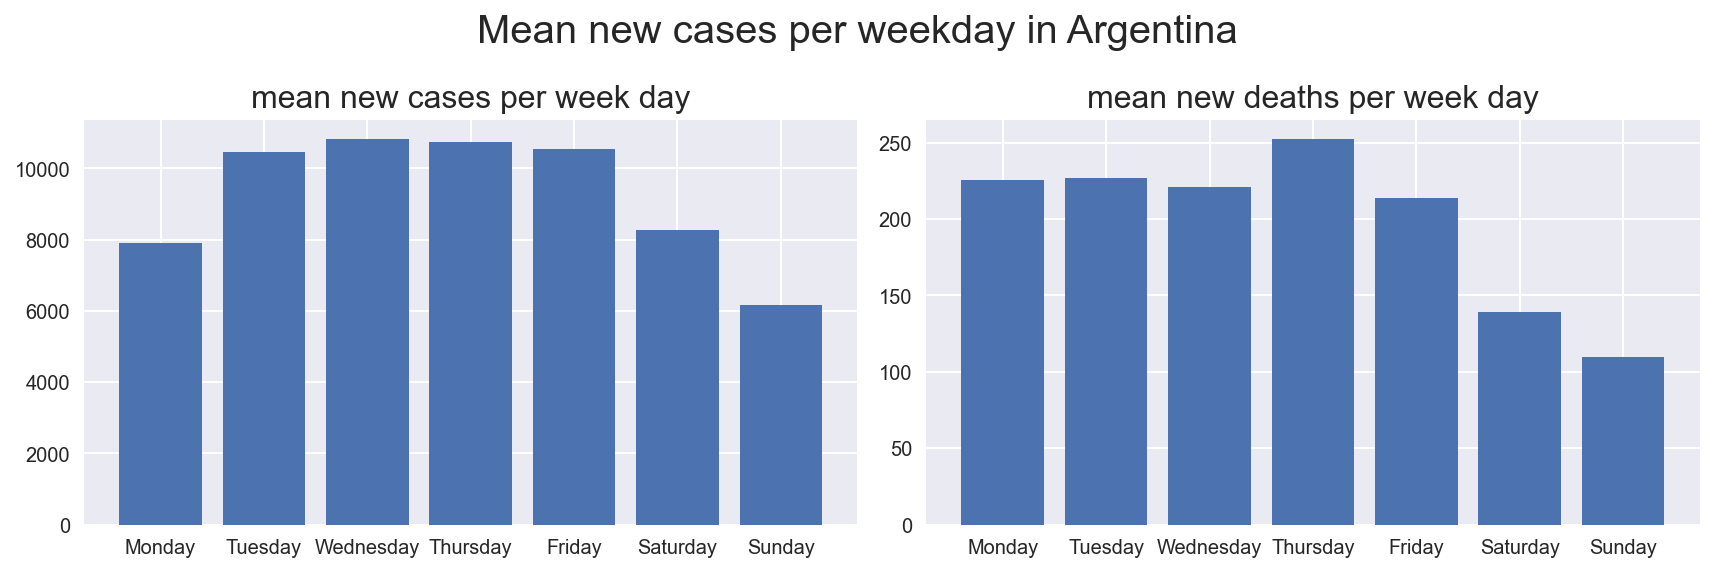

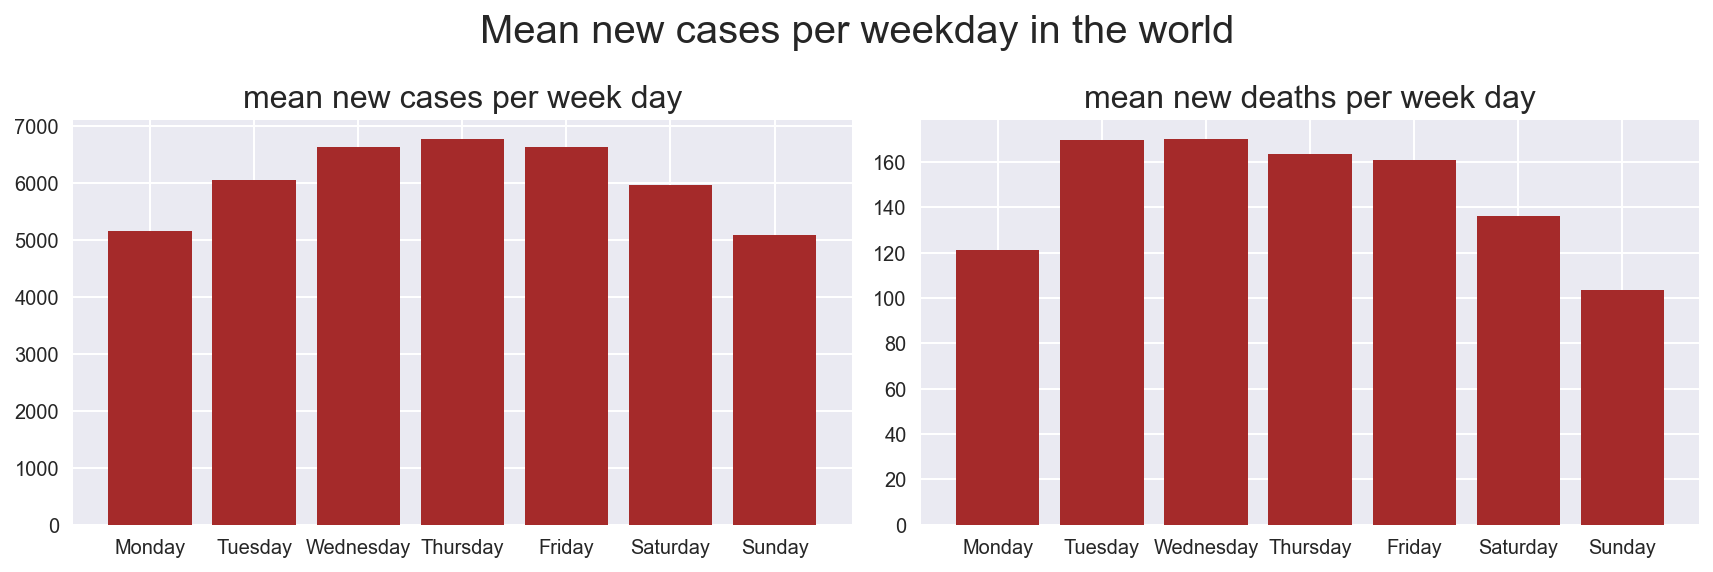

In [275]:
# Let's analyze this phenomenon in the world

df_argentina = df[df['location'] == 'Argentina']

weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig1,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].bar(df_argentina.groupby('weekday').mean()['new_cases'].index,df_argentina.groupby('weekday').mean()['new_cases'].values)
ax[0].set_title("mean new cases per week day",size=16)
a0 = ax[0].set_xticks(df_argentina.groupby('weekday').mean()['new_cases'].index)
a1 = ax[0].set_xticklabels(weekdays)

ax[1].bar(df_argentina.groupby('weekday').mean()['new_deaths'].index,df_argentina.groupby('weekday').mean()['new_deaths'].values)
ax[1].set_title("mean new deaths per week day",size=16)
b0 = ax[1].set_xticks(df_argentina.groupby('weekday').mean()['new_deaths'].index)
b1 = ax[1].set_xticklabels(weekdays)
fig1.suptitle('Mean new cases per weekday in Argentina',fontsize=20)
fig1.tight_layout()

fig2,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].bar(df.groupby('weekday').mean()['new_cases'].index,df.groupby('weekday').mean()['new_cases'].values,color='brown')
ax[0].set_title("mean new cases per week day",size=16)
c0 = ax[0].set_xticks(df.groupby('weekday').mean()['new_cases'].index)
c1 = ax[0].set_xticklabels(weekdays)

ax[1].bar(df.groupby('weekday').mean()['new_deaths'].index,df.groupby('weekday').mean()['new_deaths'].values,color='brown')
ax[1].set_title("mean new deaths per week day",size=16)
d0 = ax[1].set_xticks(df.groupby('weekday').mean()['new_deaths'].index)
d1 = ax[1].set_xticklabels(weekdays)
fig2.suptitle('Mean new cases per weekday in the world',fontsize=20)
fig2.tight_layout()
print('Argentina is not the only country that reports less cases/deaths on Sundays, it is a worldwide trend ')

# South America

In [159]:
df_sa = df[df['continent'] == 'South America']

In [160]:
df_sa['location'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Falkland Islands', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
       'Uruguay', 'Venezuela'], dtype=object)

In [191]:
import plotly.express as px

fig = px.line(df_sa, x=df_sa.index, y="total_cases_per_million", color="location",
               hover_name="location",
                    labels={'total_cases_per_million': 'total cases per million'}
                    
                    )
fig.update_layout(
    title={
        'text': "Total cases per million people",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [190]:
import plotly.express as px

fig = px.line(df_sa, x=df_sa.index, y="total_deaths_per_million", color="location",
               hover_name="location",labels={'total_deaths_per_million': 'total deaths per million'}
                    
                    )
fig.update_layout(
    title={
        'text': "Total cases per million people",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

# Economic indexes and mortality

In [306]:
df_countries.head(5)

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2020-02-24      AFG      Asia  Afghanistan          1.0        1.0   
2020-02-25      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-26      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-27      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-28      AFG      Asia  Afghanistan          1.0        0.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-02-24                 NaN           NaN         NaN                  NaN   
2020-02-25                 NaN           NaN         NaN                  NaN   
2020-02-26                 NaN           NaN         NaN                  NaN   
2020-02-27                 NaN           NaN         NaN                  NaN   
2020-02-28                 NaN           NaN         NaN                  NaN   

            total_cases_per_million  ...  extreme_poverty  \
date                                 ...                    
2020-02-24                    0.026  ...              NaN   
2020-02-25                    0.026  ...              NaN   
2020-02-26                    0.026  ...              NaN   
2020-02-27                    0.026  ...              NaN   
2020-02-28                    0.026  ...              NaN   

            cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
date                                                                     
2020-02-24                597.029                 9.59             NaN   
2020-02-25                597.029                 9.59             NaN   
2020-02-26                597.029                 9.59             NaN   
2020-02-27                597.029                 9.59             NaN   
2020-02-28                597.029                 9.59             NaN   

            male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
date                                                                           
2020-02-24           NaN                  37.746                         0.5   
2020-02-25           NaN                  37.746                         0.5   
2020-02-26           NaN                  37.746                         0.5   
2020-02-27           NaN                  37.746                         0.5   
2020-02-28           NaN                  37.746                         0.5   

            life_expectancy  human_development_index  excess_mortality  
date                                                                    
2020-02-24            64.83                    0.511               NaN  
2020-02-25            64.83                    0.511               NaN  
2020-02-26            64.83                    0.511               NaN  
2020-02-27            64.83                    0.511               NaN  
2020-02-28            64.83                    0.511               NaN  

[5 rows x 59 columns]

/Users/lewan/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/Users/lewan/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/Users/lewan/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/Users/lewan/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/Users/lewan/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureW

Developed countries report more deaths.
Peru heads the list of deaths per million inhabitants. Outlier in the graphs below.


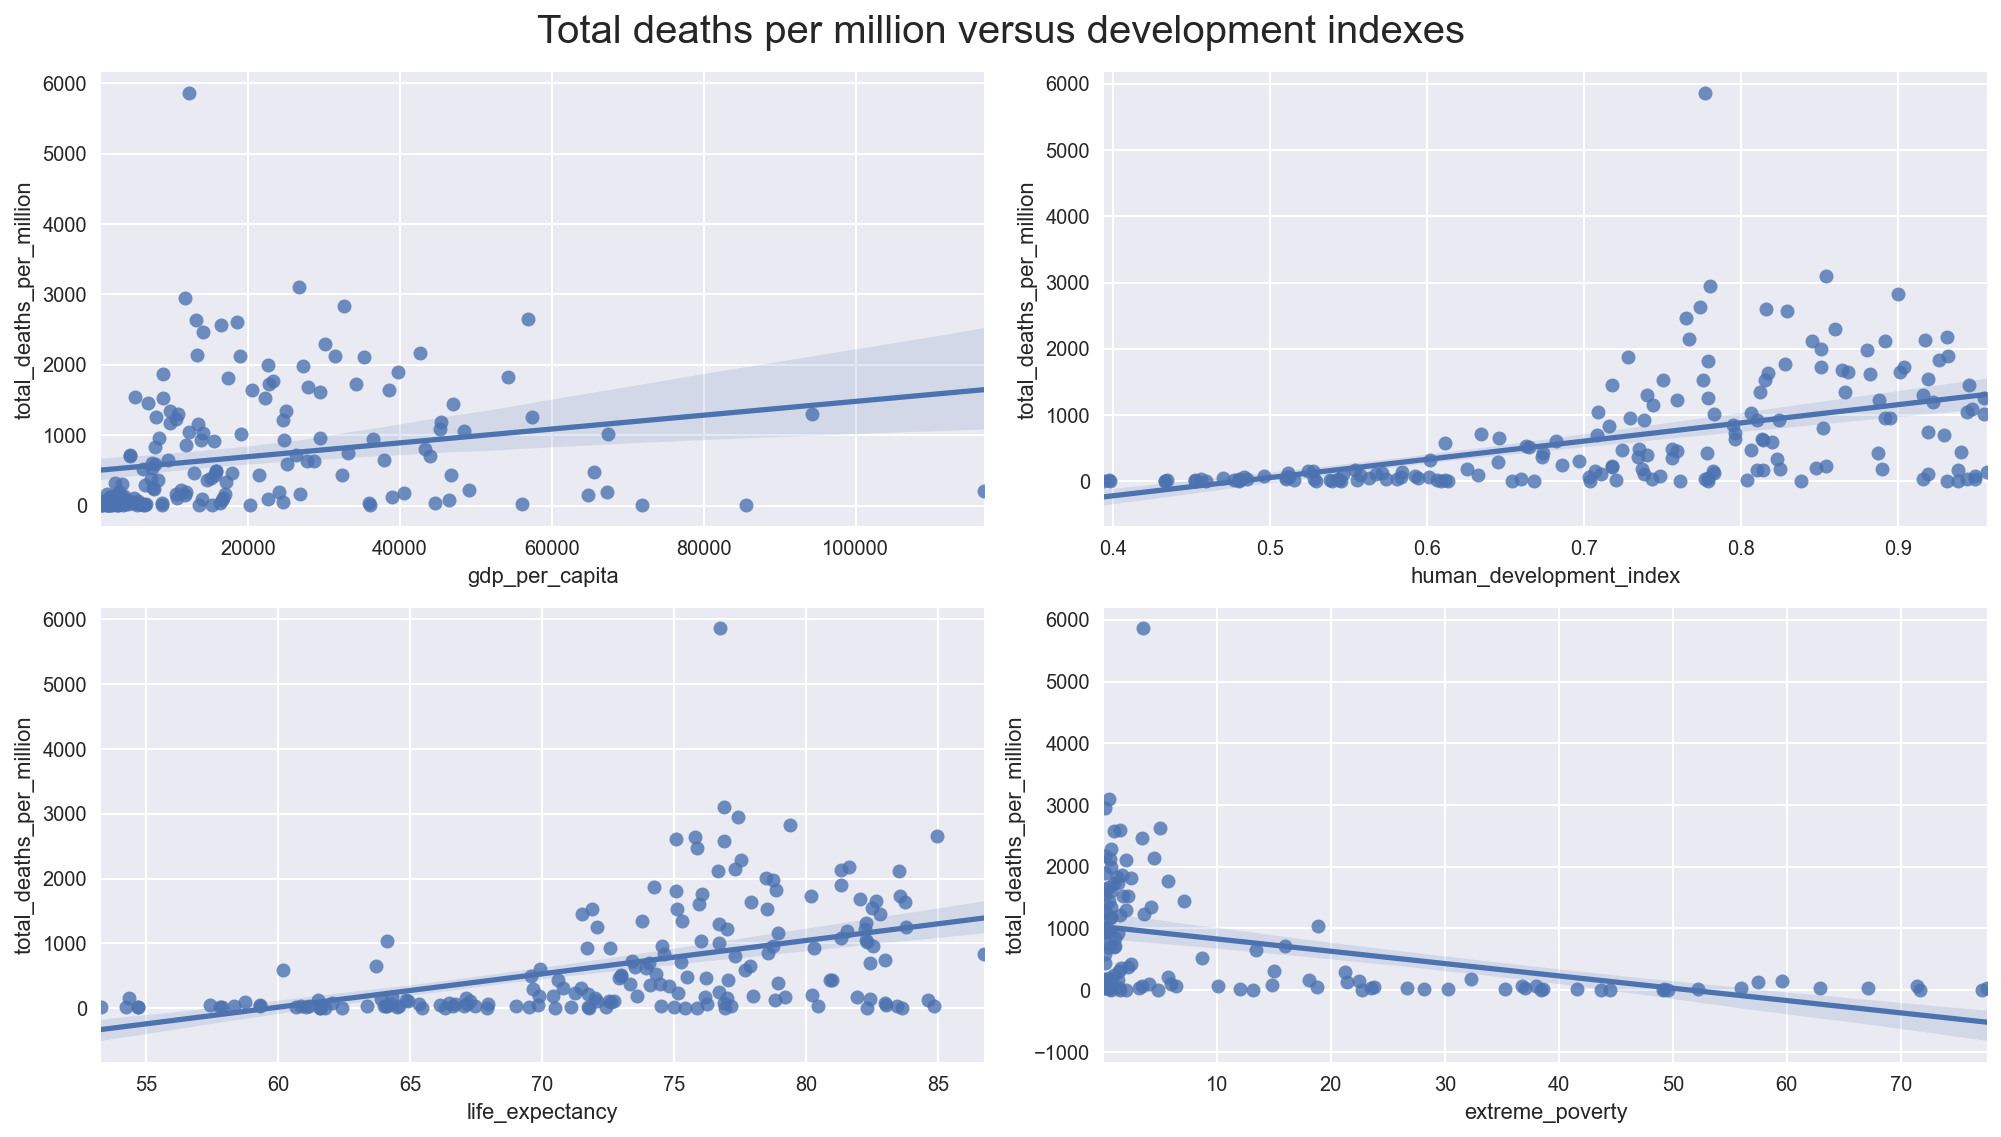

In [312]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
a1 = sns.regplot(x=df_countries.groupby('location')['total_deaths_per_million','gdp_per_capita'].max()['gdp_per_capita'],
            y=df_countries.groupby('location')['total_deaths_per_million','gdp_per_capita'].max()['total_deaths_per_million'],ax=ax[0][0])

a2 = sns.regplot(x=df_countries.groupby('location')['total_deaths_per_million','human_development_index'].max()['human_development_index'],
            y=df_countries.groupby('location')['total_deaths_per_million','human_development_index'].max()['total_deaths_per_million'],ax=ax[0][1])

a3 = sns.regplot(x=df_countries.groupby('location')['total_deaths_per_million','life_expectancy'].max()['life_expectancy'],
            y=df_countries.groupby('location')['total_deaths_per_million','life_expectancy'].max()['total_deaths_per_million'],ax=ax[1][0])

a4 = sns.regplot(x=df_countries.groupby('location')['total_deaths_per_million','extreme_poverty'].max()['extreme_poverty'],
            y=df_countries.groupby('location')['total_deaths_per_million','extreme_poverty'].max()['total_deaths_per_million'],ax=ax[1][1])

fig.suptitle('Total deaths per million versus development indexes',size=20)

fig.tight_layout()
print('Developed countries report more deaths.')
print('Peru heads the list of deaths per million inhabitants. Outlier in the graphs below.')

## Effect of the season of the year

'Hi               StackOverflow!'

On both hemispheres, the trend is that winter makes things worse


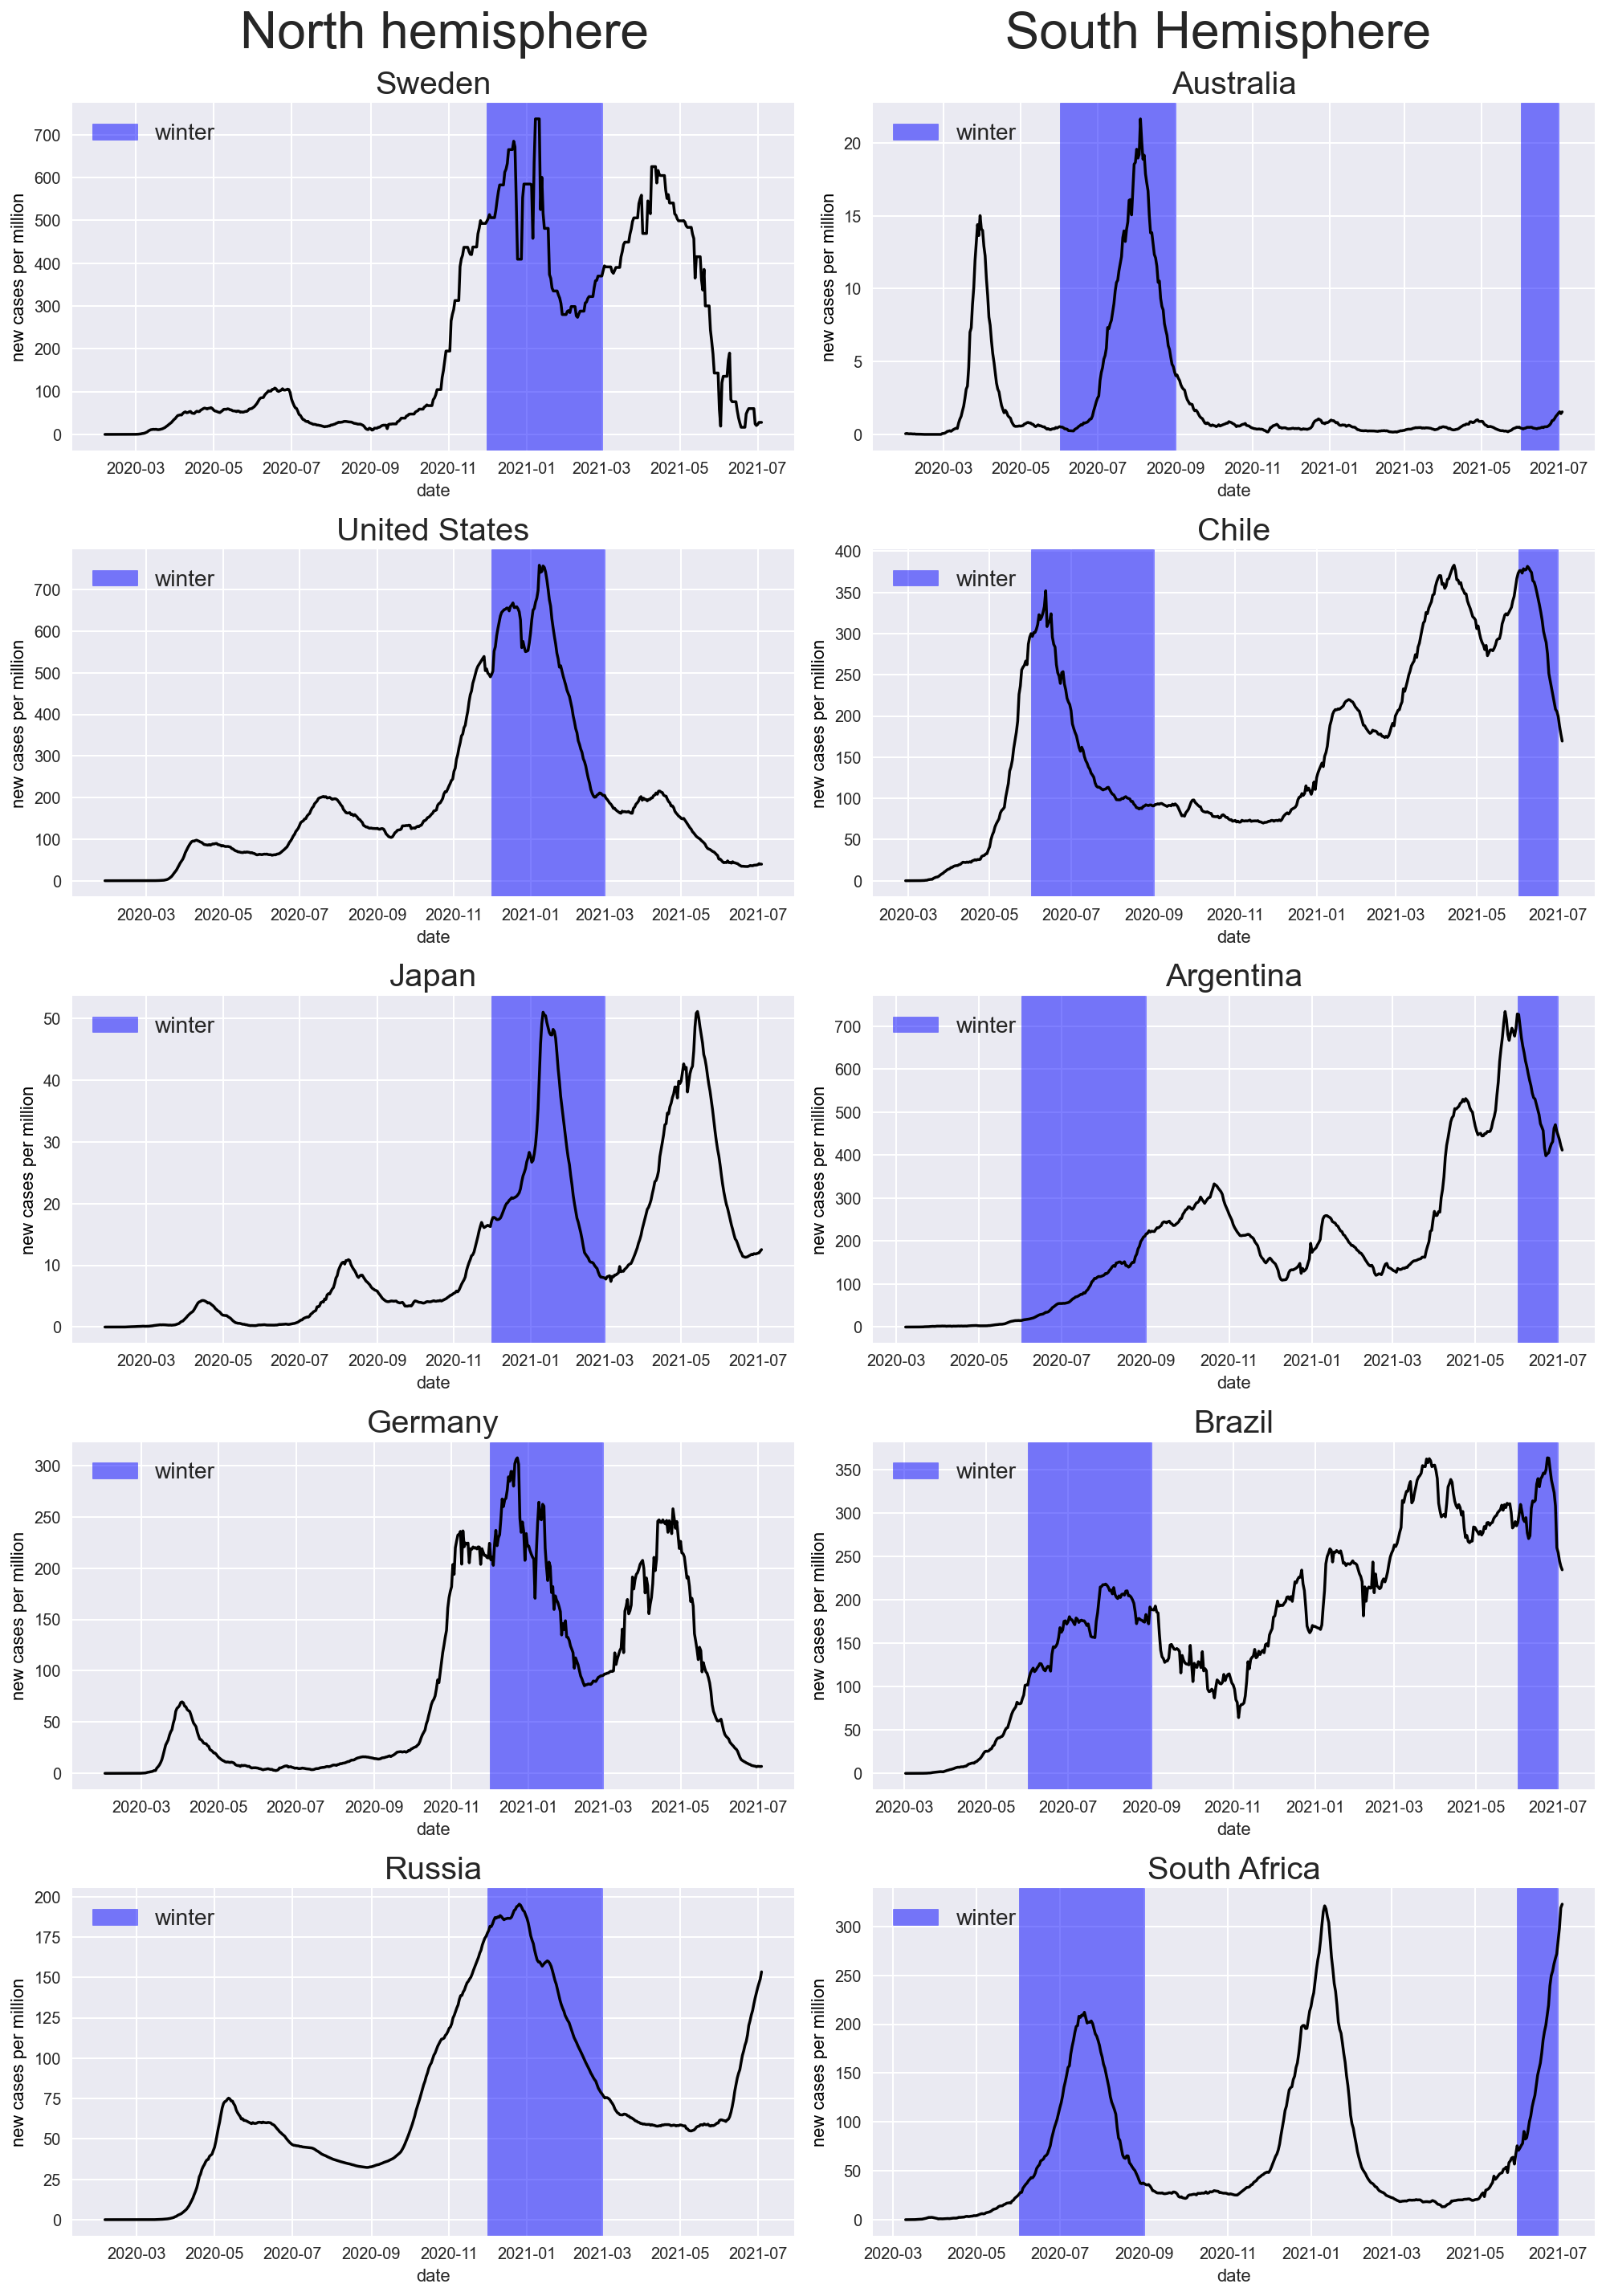

In [355]:
countries_south = ['Australia','Chile','Argentina','Brazil','South Africa']
countries_north = ['Sweden','United States','Japan','Germany','Russia']
fig,ax = plt.subplots(5,2,figsize=(14,20))
ax = ax.ravel()
for i,country in enumerate(['Sweden','Australia','United States','Chile','Japan','Argentina','Germany','Brazil','Russia','South Africa']):

    ax[i].plot(df[df['location'] == country]['new_cases_smoothed_per_million'],color='black')
    ax[i].set_title(country,size=20)
    ax[i].set_xlabel('date')
    ax[i].set_ylabel('new cases per million', color='black')
    if i % 2 == 1:  # South Hemisphere
        ax[i].axvspan('2020-06','2020-09', color='blue', alpha=0.5,label='winter')
        ax[i].axvspan('2021-06','2021-07', color='blue', alpha=0.5)
    else:
        ax[i].axvspan('2020-12','2021-03', color='blue', alpha=0.5,label='winter')
    ax[i].legend(loc='upper left',fontsize=(14))

fig.suptitle(f'{"North hemisphere": <40} South Hemisphere',size=32,x=0.52,y=0.99)
fig.tight_layout()
print('On both hemispheres, the trend is that winter makes things worse')

South America is the continent that continues struggling the most


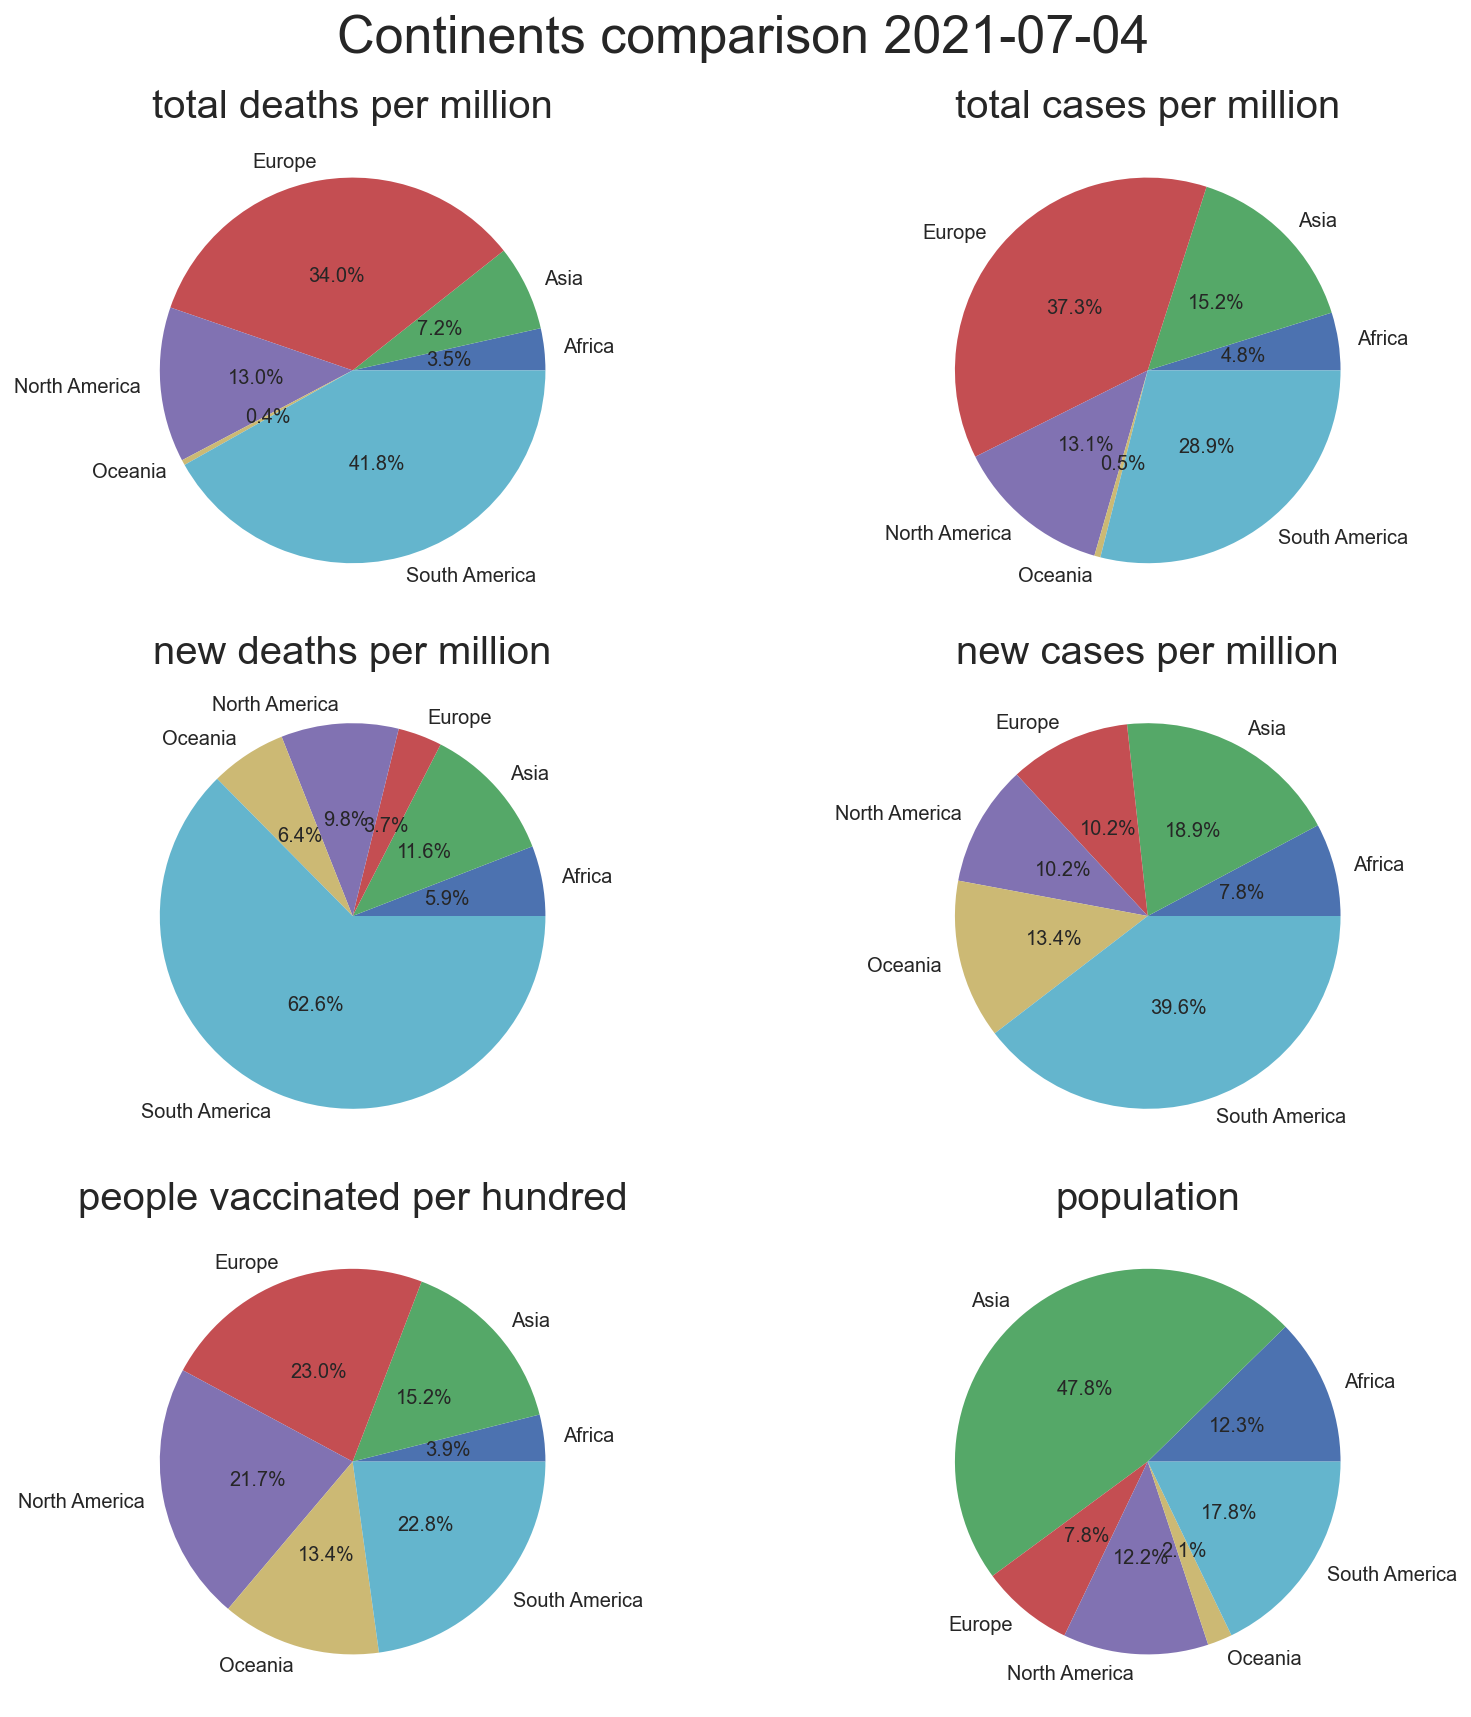

In [374]:
fig,ax = plt.subplots(3,2,figsize=(12,12))
plt.suptitle(f'Continents comparison {df.index[-1].date()} ',size=26,y=0.99)
ax = ax.ravel()
for j,i in enumerate(['total_deaths_per_million','total_cases_per_million','new_deaths_per_million','new_cases_per_million','people_vaccinated_per_hundred','population']):
    ax[j].set_title(' '.join(i.split('_')),size=20)
    ax[j].pie(x=df.loc[df.index[-1]].groupby('continent').mean()[i], autopct="%.1f%%", labels=df.loc[df.index[-1]].groupby('continent').mean()[i].index, pctdistance=0.5)
fig.tight_layout()
print('South America is the continent that continues struggling the most')